In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
OnlineRetail = pd.read_excel('Online Retail.xlsx')
OnlineRetail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
#Selecting transaction which occured between 01/04/ 2011 and 09/12/2011and create a dataset OR2
OR1 = OnlineRetail[OnlineRetail['InvoiceDate']>'2011-04-01']
OR2 = OR1[OR1['InvoiceDate']<'2011-12-09']
OR2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


In [5]:
OR3 = OR2.loc[OR2.Quantity>0]
OR3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


In [6]:
#Finding unique CustomerIDs and storing them in an array
CustomerID = OR3['CustomerID'].unique()
CustomerID

RFM = pd.DataFrame(columns = ['CustomerID','Recency', 'Frequency','Monetary Value'])
RFM['CustomerID'] = CustomerID
RFM

RFM.sort_values(by ='CustomerID',inplace = True)
RFM

,CustomerID,Recency,Frequency,Monetary Value
208,12347.0,NaN,NaN,NaN
139,12348.0,NaN,NaN,NaN
3670,12349.0,NaN,NaN,NaN
2756,12352.0,NaN,NaN,NaN
1364,12353.0,NaN,NaN,NaN
...,...,...,...,...
1727,18281.0,NaN,NaN,NaN
2360,18282.0,NaN,NaN,NaN
755,18283.0,NaN,NaN,NaN
1392,18287.0,NaN,NaN,NaN


In [7]:
for CID in CustomerID:
    RFM.loc[RFM.CustomerID==CID, 'Frequency'] = OR3[OR3['CustomerID']==CID]['InvoiceNo'].value_counts().sum()
    RFM.loc[RFM.CustomerID==CID, 'Recency'] = (12-OR3.loc[OR3.CustomerID==CID,'InvoiceDate'].max().date().month)

    InvoiceArr=OR3.loc[OR3.CustomerID==CID,'InvoiceNo'].unique()
    sum=0
    for INo in InvoiceArr:
        sum+=((OR3.loc[OR3.InvoiceNo==INo,'UnitPrice']*OR3.loc[OR3.InvoiceNo==INo,'Quantity']).sum())
    RFM.loc[RFM.CustomerID==CID, 'Monetary Value'] = sum
RFM


,CustomerID,Recency,Frequency,Monetary Value
208,12347.0,0,122,3122.82
139,12348.0,3,8,677.0
3670,12349.0,1,73,1757.55
2756,12352.0,1,47,944.23
1364,12353.0,7,4,89.0
...,...,...,...,...
1727,18281.0,6,7,80.82
2360,18282.0,0,12,178.05
755,18283.0,0,624,1776.98
1392,18287.0,2,70,1837.28


In [8]:

RFMc = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary Value'])
RFMc['Recency'] = RFM['Recency'].dropna()
RFMc['Frequency'] = RFM['Frequency'].dropna()
RFMc['Monetary Value'] = RFM['Monetary Value'].dropna()
RFMc

,Recency,Frequency,Monetary Value
208,0,122,3122.82
139,3,8,677.0
3670,1,73,1757.55
2756,1,47,944.23
1364,7,4,89.0
...,...,...,...
2878,3,9,173.9
1727,6,7,80.82
2360,0,12,178.05
755,0,624,1776.98


In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(RFMc)
X


array([[-1.07288293,  0.21724776,  0.20395143],
       [ 0.309771  , -0.35435636, -0.14657353],
       [-0.61199829, -0.02844173,  0.0082865 ],
       ...,
       [-1.07288293, -0.33430007, -0.21808101],
       [-1.07288293,  2.7343115 ,  0.01107113],
       [-0.15111364, -0.04348394,  0.01971308]])

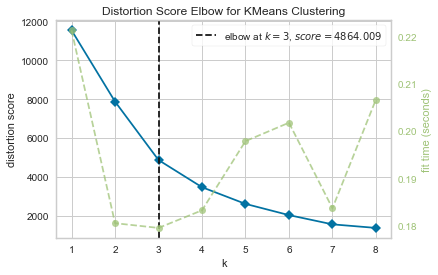

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,9))
visualizer.fit(X)
visualizer.show()

In [11]:
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
model

KMeans(n_clusters=3)

In [12]:
RFMc['Cluster'] = k_means.predict(X)
RFMc

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,0
139,3,8,677.0,0
3670,1,73,1757.55,0
2756,1,47,944.23,0
1364,7,4,89.0,1
...,...,...,...,...
2878,3,9,173.9,0
1727,6,7,80.82,1
2360,0,12,178.05,0
755,0,624,1776.98,0


In [13]:
RFMc0 = RFMc[RFMc['Cluster']==0]
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc0.loc[:,col].min())
    print("Median: ", RFMc0.loc[:,col].median())
    print("Mean: ", RFMc0.loc[:,col].mean())
    print("Max: ", RFMc0.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc0['Monetary Value'].sum())  

Recency
Min:  0
Median:  1.0
Mean:  1.3031735313977042
Max:  3

Frequency
Min:  1
Median:  49.0
Mean:  86.27548953409858
Max:  1716

Monetary Value
Min:  0.0
Median:  790.6099999999999
Mean:  1704.2416046590158
Max:  65466.94000000001

Total Monetary Value: 5047963.633000005


In [14]:
RFMc1 = RFMc[RFMc['Cluster']==1]
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc1.loc[:,col].min())
    print("Median: ", RFMc1.loc[:,col].median())
    print("Mean: ", RFMc1.loc[:,col].mean())
    print("Max: ", RFMc1.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc1['Monetary Value'].sum()) 

Recency
Min:  4
Median:  6.0
Mean:  5.806378132118451
Max:  8

Frequency
Min:  1
Median:  18.0
Mean:  26.604783599088837
Max:  284

Monetary Value
Min:  2.9
Median:  314.95
Mean:  574.5736230068342
Max:  39916.5

Total Monetary Value: 504475.6410000004


In [15]:
RFMc2 = RFMc[RFMc['Cluster']==2]
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc2.loc[:,col].min())
    print("Median: ", RFMc2.loc[:,col].median())
    print("Mean: ", RFMc2.loc[:,col].mean())
    print("Max: ", RFMc2.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc2['Monetary Value'].sum())  

Recency
Min:  0
Median:  0.0
Mean:  0.2222222222222222
Max:  1

Frequency
Min:  245
Median:  1480.0
Mean:  2655.8888888888887
Max:  6782

Monetary Value
Min:  27409.710000000006
Median:  87071.79000000002
Mean:  109980.25666666668
Max:  213908.45000000004

Total Monetary Value: 989822.3100000002


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


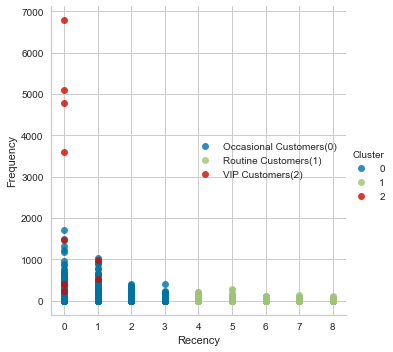

In [16]:
#Scatterplot: Frequency vs Recency
facet = sns.lmplot(data=RFMc, x='Recency', y='Frequency', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


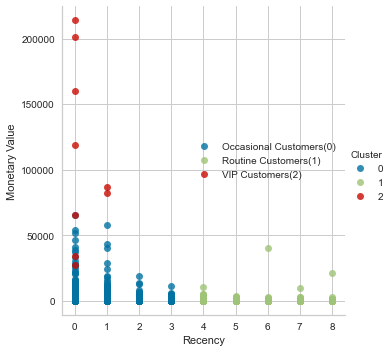

In [17]:
#Scatterplot: Monetary Value vs Recency
facet = sns.lmplot(data=RFMc, x='Recency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


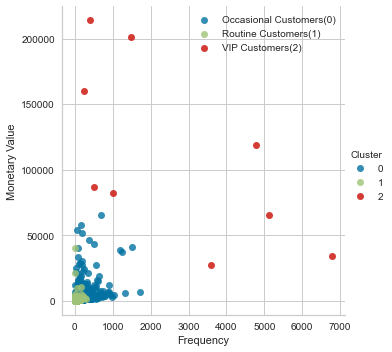

In [18]:
#Scatterplot: Monetary Value vs Frequency
ax = sns.lmplot(data=RFMc, x='Frequency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, scatter=True)
plt.legend(loc='upper right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

In [19]:
RFMac = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary Value'])
RFMac['Recency'] = RFM['Recency'].dropna()
RFMac['Frequency'] = RFM['Frequency'].dropna()
RFMac['Monetary Value'] = RFM['Monetary Value'].dropna()
RFMac

,Recency,Frequency,Monetary Value
208,0,122,3122.82
139,3,8,677.0
3670,1,73,1757.55
2756,1,47,944.23
1364,7,4,89.0
...,...,...,...
2878,3,9,173.9
1727,6,7,80.82
2360,0,12,178.05
755,0,624,1776.98


In [20]:
Xac = StandardScaler().fit_transform(RFMac)
Xac

array([[-1.07288293,  0.21724776,  0.20395143],
       [ 0.309771  , -0.35435636, -0.14657353],
       [-0.61199829, -0.02844173,  0.0082865 ],
       ...,
       [-1.07288293, -0.33430007, -0.21808101],
       [-1.07288293,  2.7343115 ,  0.01107113],
       [-0.15111364, -0.04348394,  0.01971308]])

In [21]:
ac = AgglomerativeClustering(n_clusters = 3)
RFMac['Cluster'] = ac.fit_predict(Xac)
RFMac

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,1
139,3,8,677.0,1
3670,1,73,1757.55,1
2756,1,47,944.23,1
1364,7,4,89.0,2
...,...,...,...,...
2878,3,9,173.9,1
1727,6,7,80.82,2
2360,0,12,178.05,1
755,0,624,1776.98,1


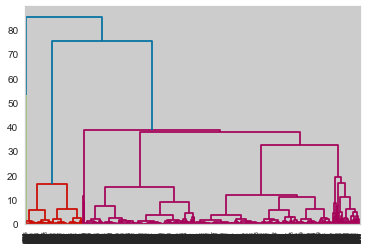

In [22]:
import scipy.cluster.hierarchy as shc
#Visualising clusters usind dendrogram
Dendrogram = shc.dendrogram((shc.linkage(Xac, method ='ward')))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


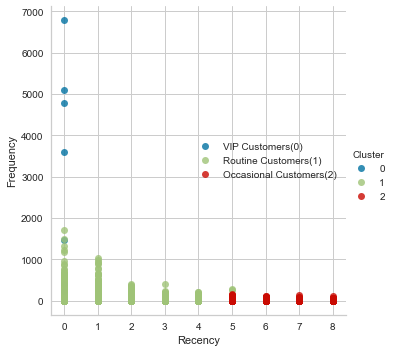

In [23]:
facet2a = sns.lmplot(data=RFMac, x='Recency', y='Frequency', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


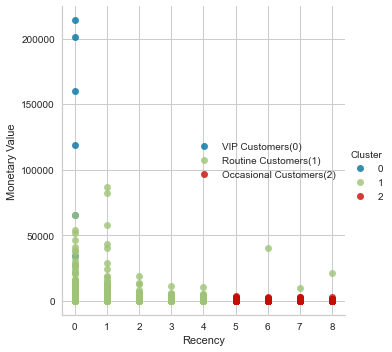

In [24]:
facet2b = sns.lmplot(data=RFMac, x='Recency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


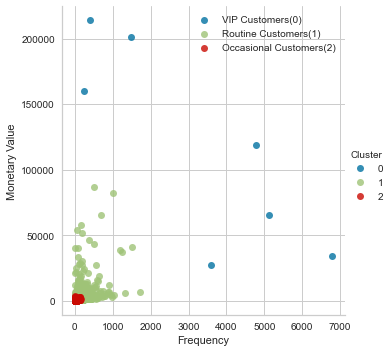

In [25]:

facet2c = sns.lmplot(data=RFMac, x='Frequency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='upper right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

In these 3 scatterplots, it is seen that the cluster boundaries are much more clearer. They do not mix up with other clusters and have greater intra-cluster similarity
Hence Agglomerative Clustering yeilds better cluster predictions in this case